# AUTONORMALIZE DEMO 
Using Autonormalize to normalize a kaggle dataset about liquor purchasing orders.

In [1]:
import os

import pandas as pd
import autonormalize as an

In [2]:
liquor_df = pd.read_csv(os.path.join(os.getcwd(), 'autonormalize/downloads/liquor.csv'))
liquor_df = liquor_df.drop(columns=liquor_df.columns[12:])
liquor_df = liquor_df.drop(range(3000000, 12591077))
liquor_df_smaller = liquor_df.drop(range(1500000, 3000000))
liquor_df = liquor_df.dropna()
liquor_df = liquor_df.drop_duplicates()
liquor_df_smaller = liquor_df_smaller.dropna()
liquor_df_smaller = liquor_df_smaller.drop_duplicates()
liquor_df.head(3)

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Invoice/Item Number,Date,Store Number,Store Name,Address,City,Zip Code,Store Location,County Number,County,Category,Category Name
6,S28865700001,11/09/2015,2538,Hy-Vee Food Store #3 / Waterloo,1422 FLAMMANG DR,WATERLOO,50702,"1422 FLAMMANG DR\nWATERLOO 50702\n(42.459938, ...",7.0,Black Hawk,1701100.0,DECANTERS & SPECIALTY PACKAGES
8,S29339300091,11/30/2015,2662,Hy-Vee Wine & Spirits / Muscatine,"522 MULBERRY, SUITE A",MUSCATINE,52761,"522 MULBERRY, SUITE A\nMUSCATINE 52761\n",70.0,Muscatine,1701100.0,DECANTERS & SPECIALTY PACKAGES
13,S28866900001,11/11/2015,3650,"Spirits, Stogies and Stuff",118 South Main St.,HOLSTEIN,51025,118 South Main St.\nHOLSTEIN 51025\n(42.490073...,47.0,Ida,1701100.0,DECANTERS & SPECIALTY PACKAGES


In [3]:
deps_approx = an.find_dependencies(liquor_df_smaller, 0.96)
print(deps_approx)

100%|██████████| 11/11 [09:51<00:00, 65.85s/it]


 --> Invoice/Item Number
 {Invoice/Item Number}  --> Date
 {Address}  {Store Name}  {Invoice/Item Number}  {Store Location}  --> Store Number
 {Store Number}  {Address}  {Invoice/Item Number}  {Store Location}  --> Store Name
 {Store Number}  {Store Name}  {Invoice/Item Number}  {Store Location}  --> Address
 {Store Name}  {Invoice/Item Number}  {Store Location}  {Store Number}  {Zip Code}  {Address}  --> City
 {Store Name}  {Invoice/Item Number}  {Store Location}  {Store Number}  {Address}  --> Zip Code
 {Store Number}  {Address}  {Invoice/Item Number}  {Store Name}  --> Store Location
 {Store Name}  {County}  {Invoice/Item Number}  {Store Location}  {Store Number}  {Zip Code}  {Address}  {City}  --> County Number
 {Store Name}  {County Number}  {Invoice/Item Number}  {Store Location}  {Store Number}  {Zip Code}  {Address}  {City}  --> County
 {Category Name}  {Invoice/Item Number}  --> Category
 {Invoice/Item Number}  {Category}  --> Category Name


In [5]:
entity_set = an.make_entityset(liquor_df_smaller, deps_approx, 'liquor_orders')

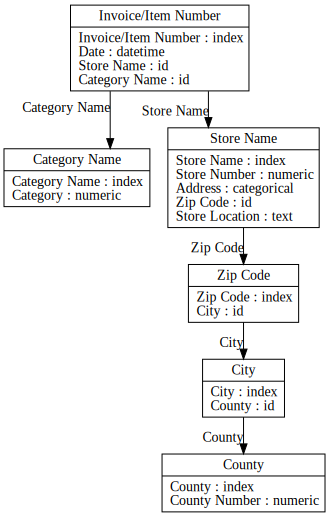

In [6]:
entity_set.plot()